## Credit Card Fraud Detection 

By - Arindam Sarkar

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 

##### Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 
The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building. 

##### Business problem overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.  

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In order to complete the project, we are going to follow below high level steps to build and select best model.
- Read the dataset and perform exploratory data analysis
- Building different classification models on the unbalanced data
- Building different models on 3 different balancing technique.
    - Random Oversampling
    - SMOTE
    - ADASYN

In [1]:
# Importing computational packages

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
# Importing visualization packages

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing model building packages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [7]:
# Importing data

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
#observe the different feature type present in the data

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Handling Missing Values

In [12]:
# Checking for the missing value present in each columns

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Class,0,0.000000
V14,0,0.000000
V1,0,0.000000
V2,0,0.000000
V3,0,0.000000
V4,0,0.000000
V5,0,0.000000
V6,0,0.000000
V7,0,0.000000
V8,0,0.000000


We can see that there is no missing value present in the dataframe.

### Outliers treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe, though we still see outliers available.

### Observe the distribution of our classes

In [13]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


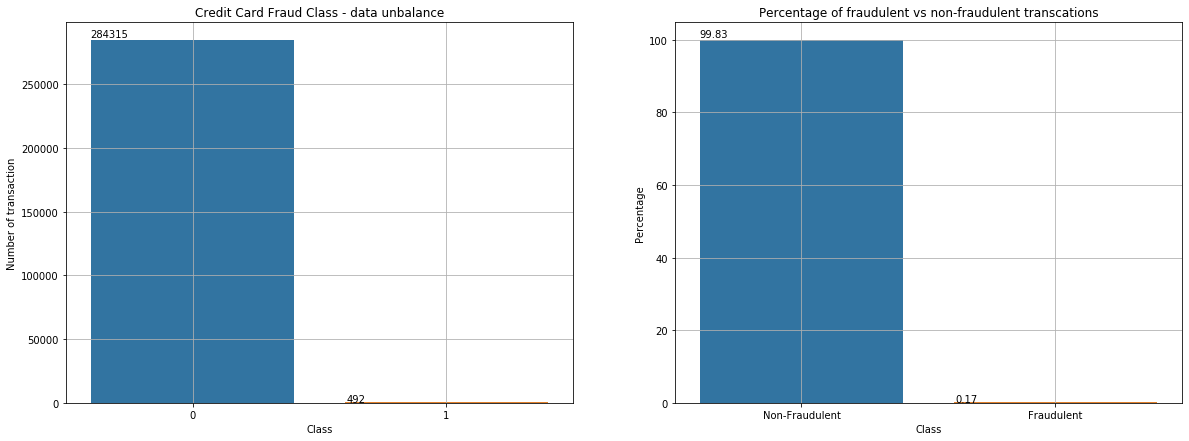

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

**Observation**

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

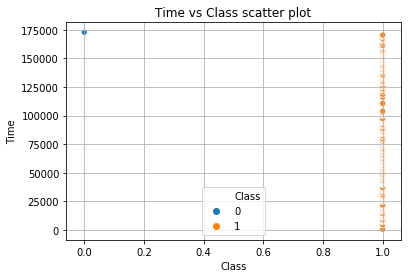

In [15]:
# Create a scatter plot to observe the distribution of classes with time

sns.scatterplot( df["Class"],df["Time"],hue=df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()

**Observation**

There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

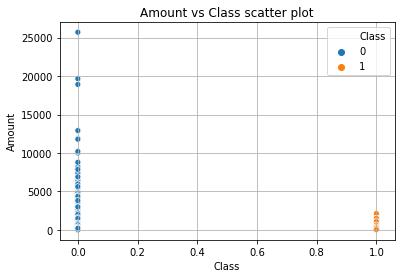

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(df["Class"],df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

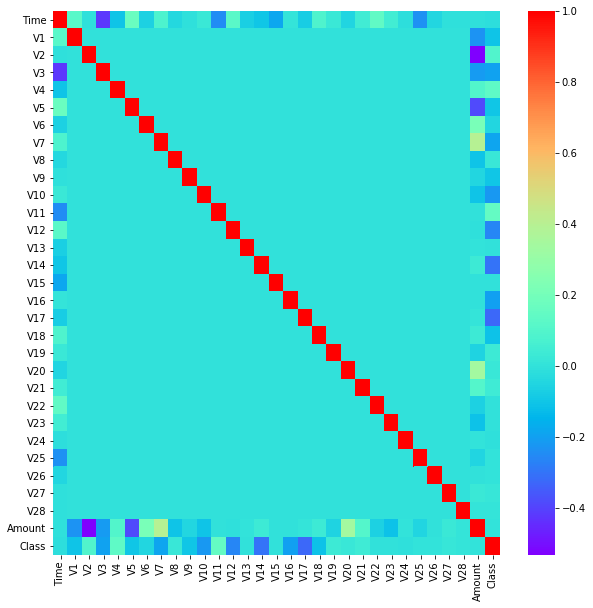

In [17]:
#plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),cmap='rainbow')
plt.show()

There are no features which there is high correlatation , corr > .75

#### Plotting the distributions of all the features

<Figure size 432x288 with 0 Axes>

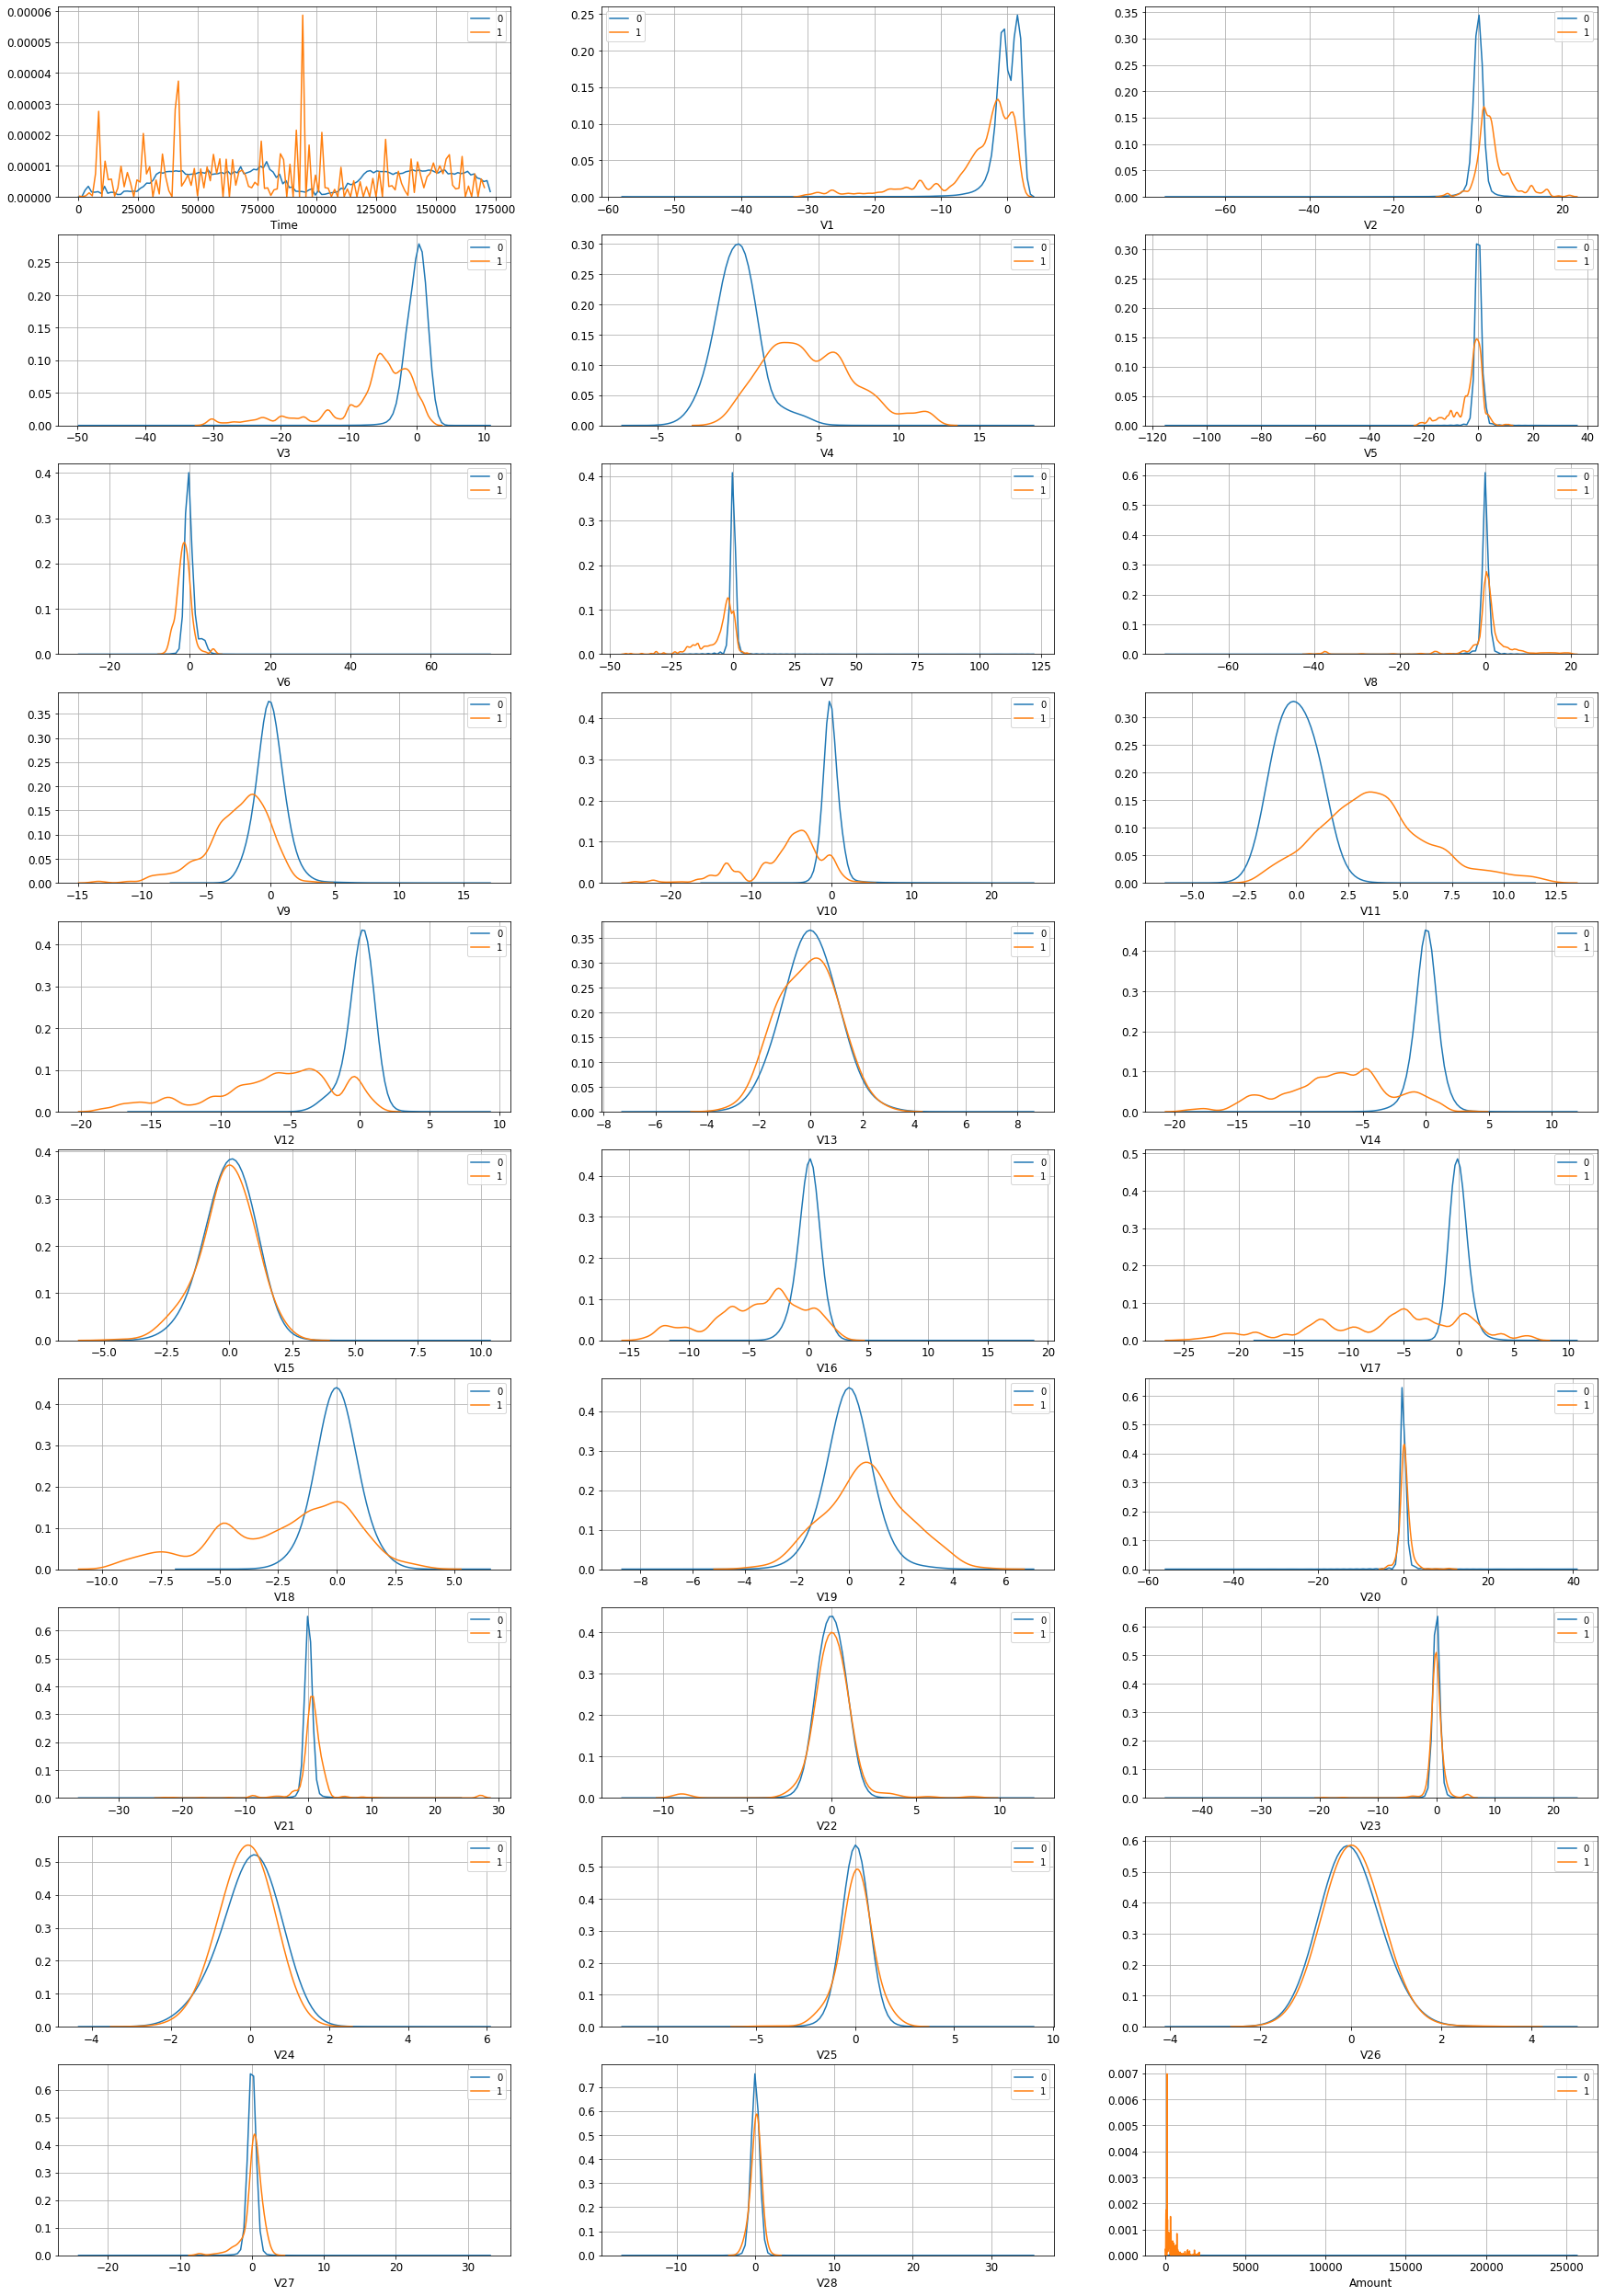

In [18]:
# Plotting all the variable in displot to visualise the distribution

var = list(df.columns.values)

# dropping Class columns from the list

var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

Dropping `Time` column as this feature is not going to help in the model building.
#### Understanding from Core Banking Business 

In [19]:
# Drop unnecessary columns

df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


### Splitting the data into train & test data

In [20]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [21]:
# Spltting the into 80:20 train test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [22]:
# Checking the split of the class label

print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


### Feature Scaling using  RobustScaler Scaler

We need to scale `Amount` column.

In [23]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field

scaler = RobustScaler()

# Scaling the train data

X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data

X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [24]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [25]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


### Plotting the distribution of a variable to handle skewness

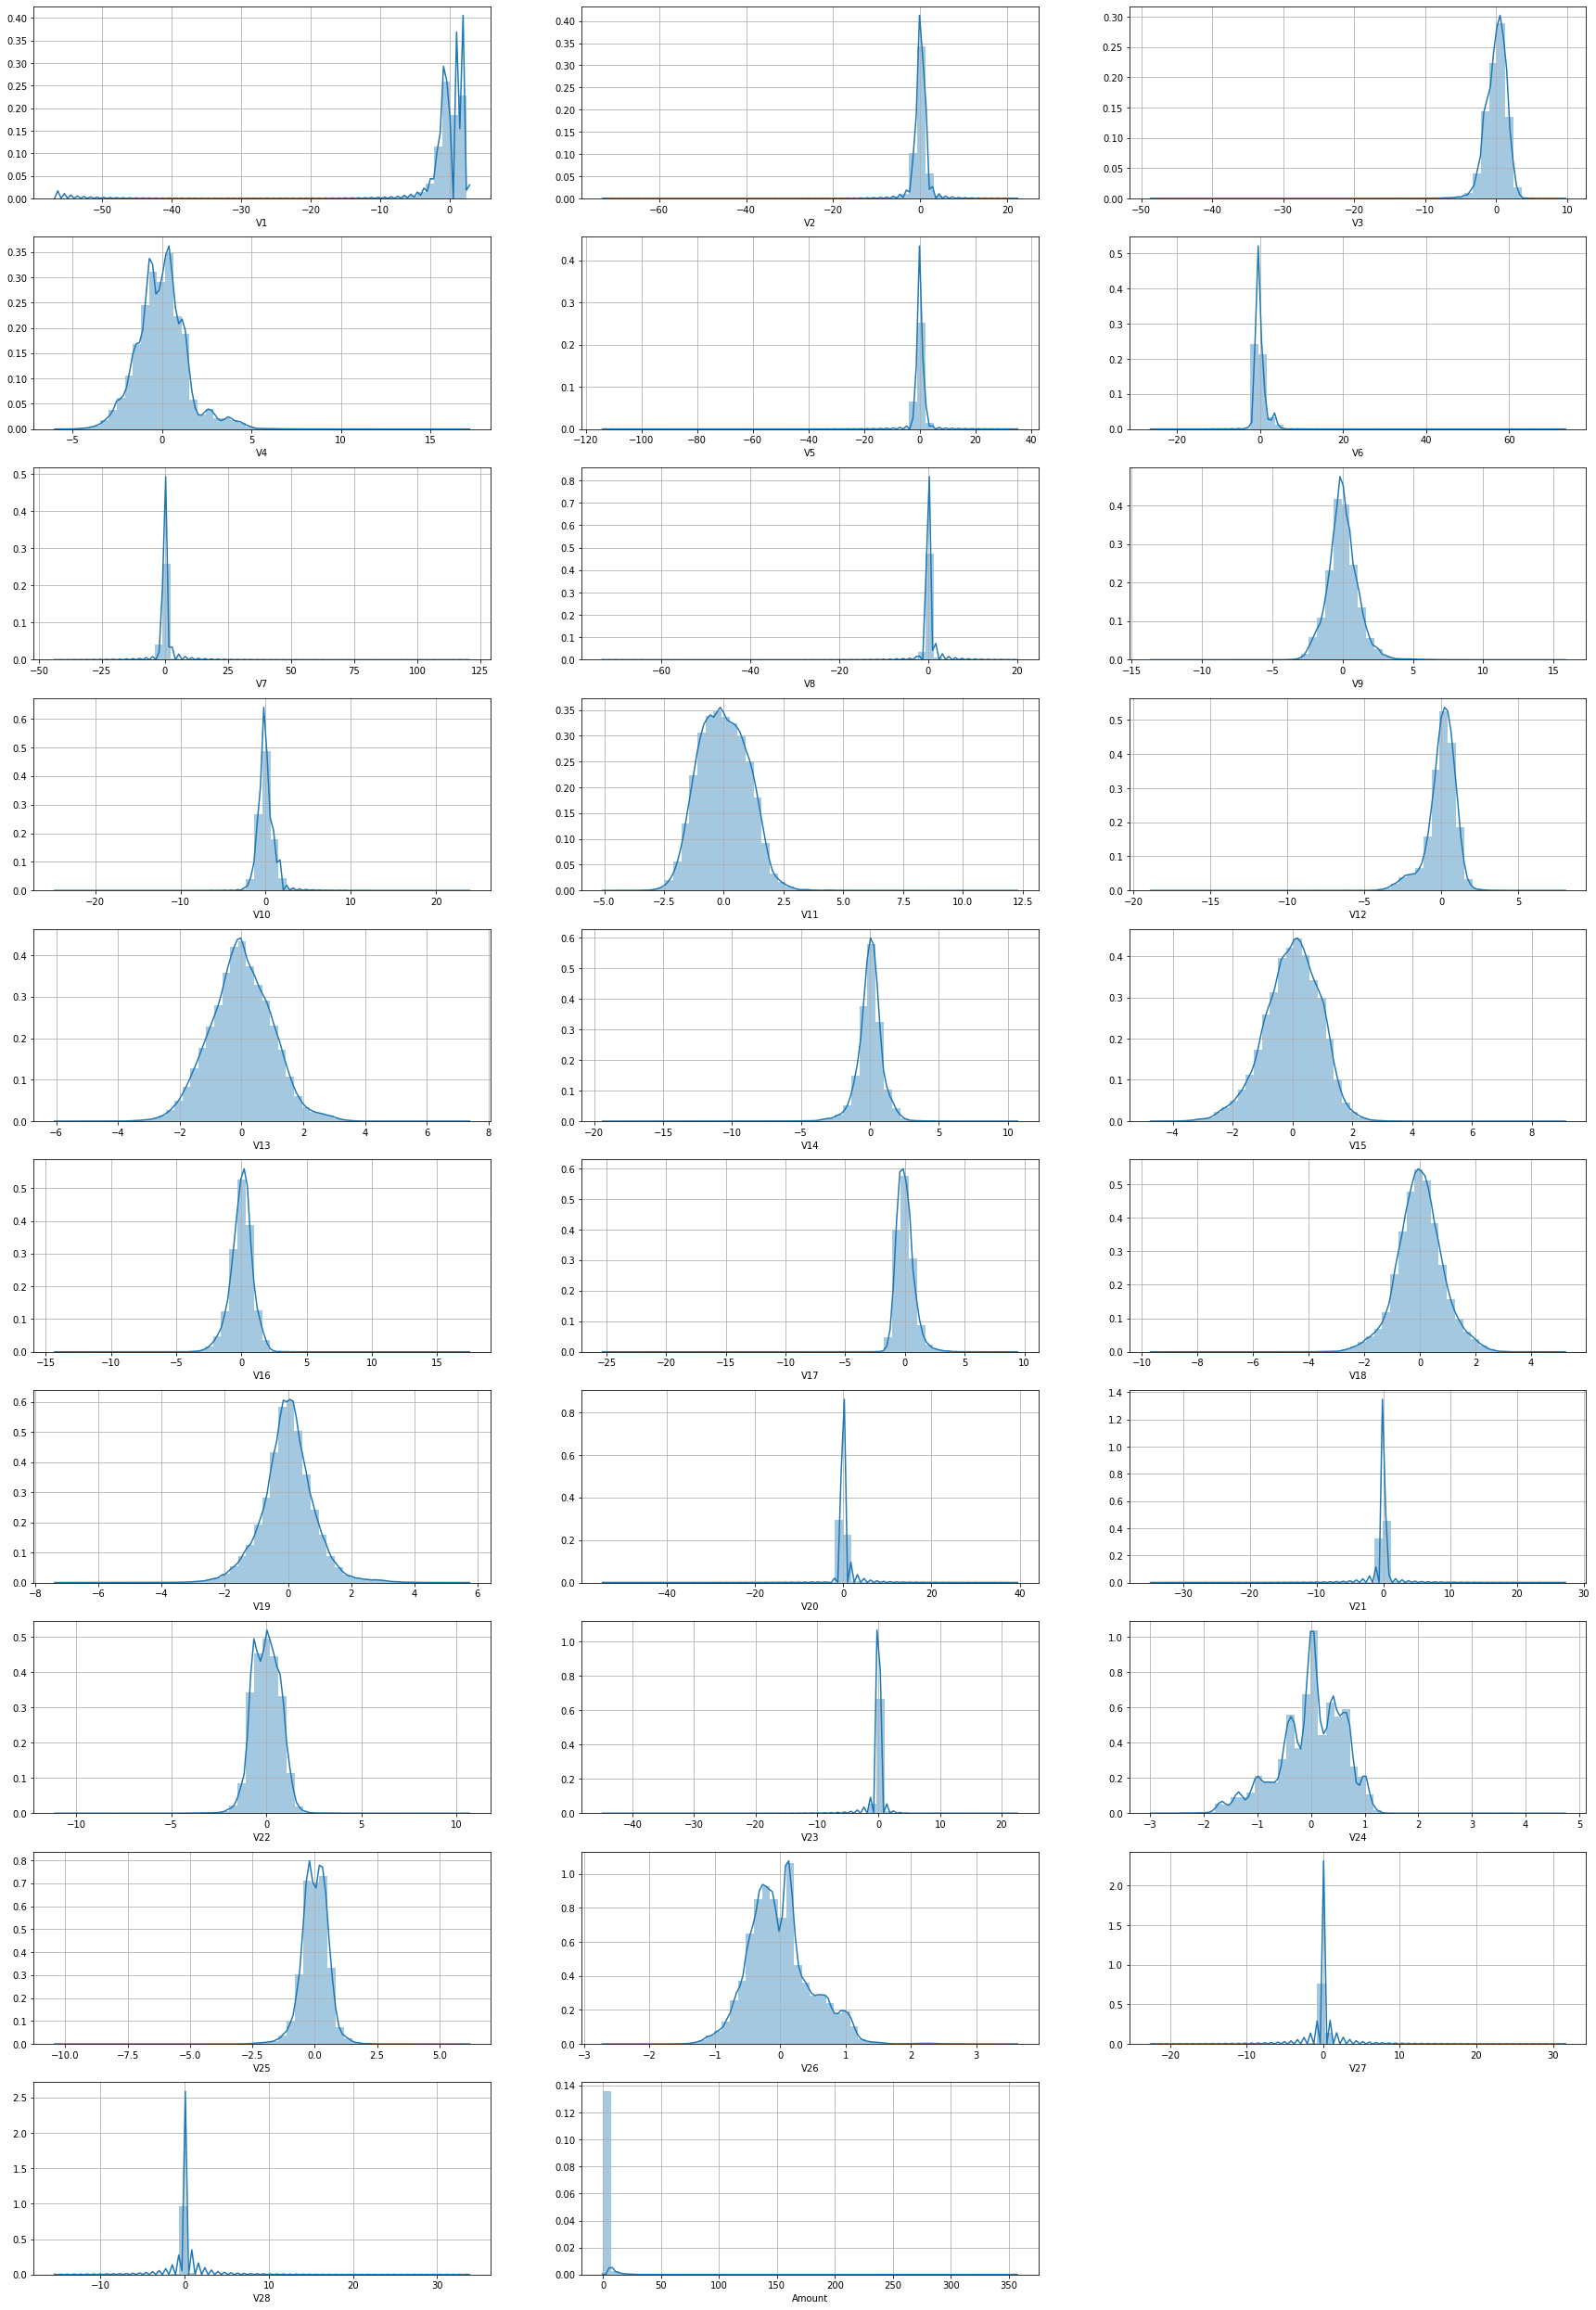

In [26]:
# plot the histogram of a variable from the dataset to see the skewness

var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [27]:
# Lets check the skewness of the features

var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [28]:
# Filtering the features which has skewness less than -1 and greater than +1

skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

### There is skewness present in the distribution of the above features:
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

In [29]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer()

# Fitting the power transformer in train data

X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data

X_test[skewed] = pt.transform(X_test[skewed])

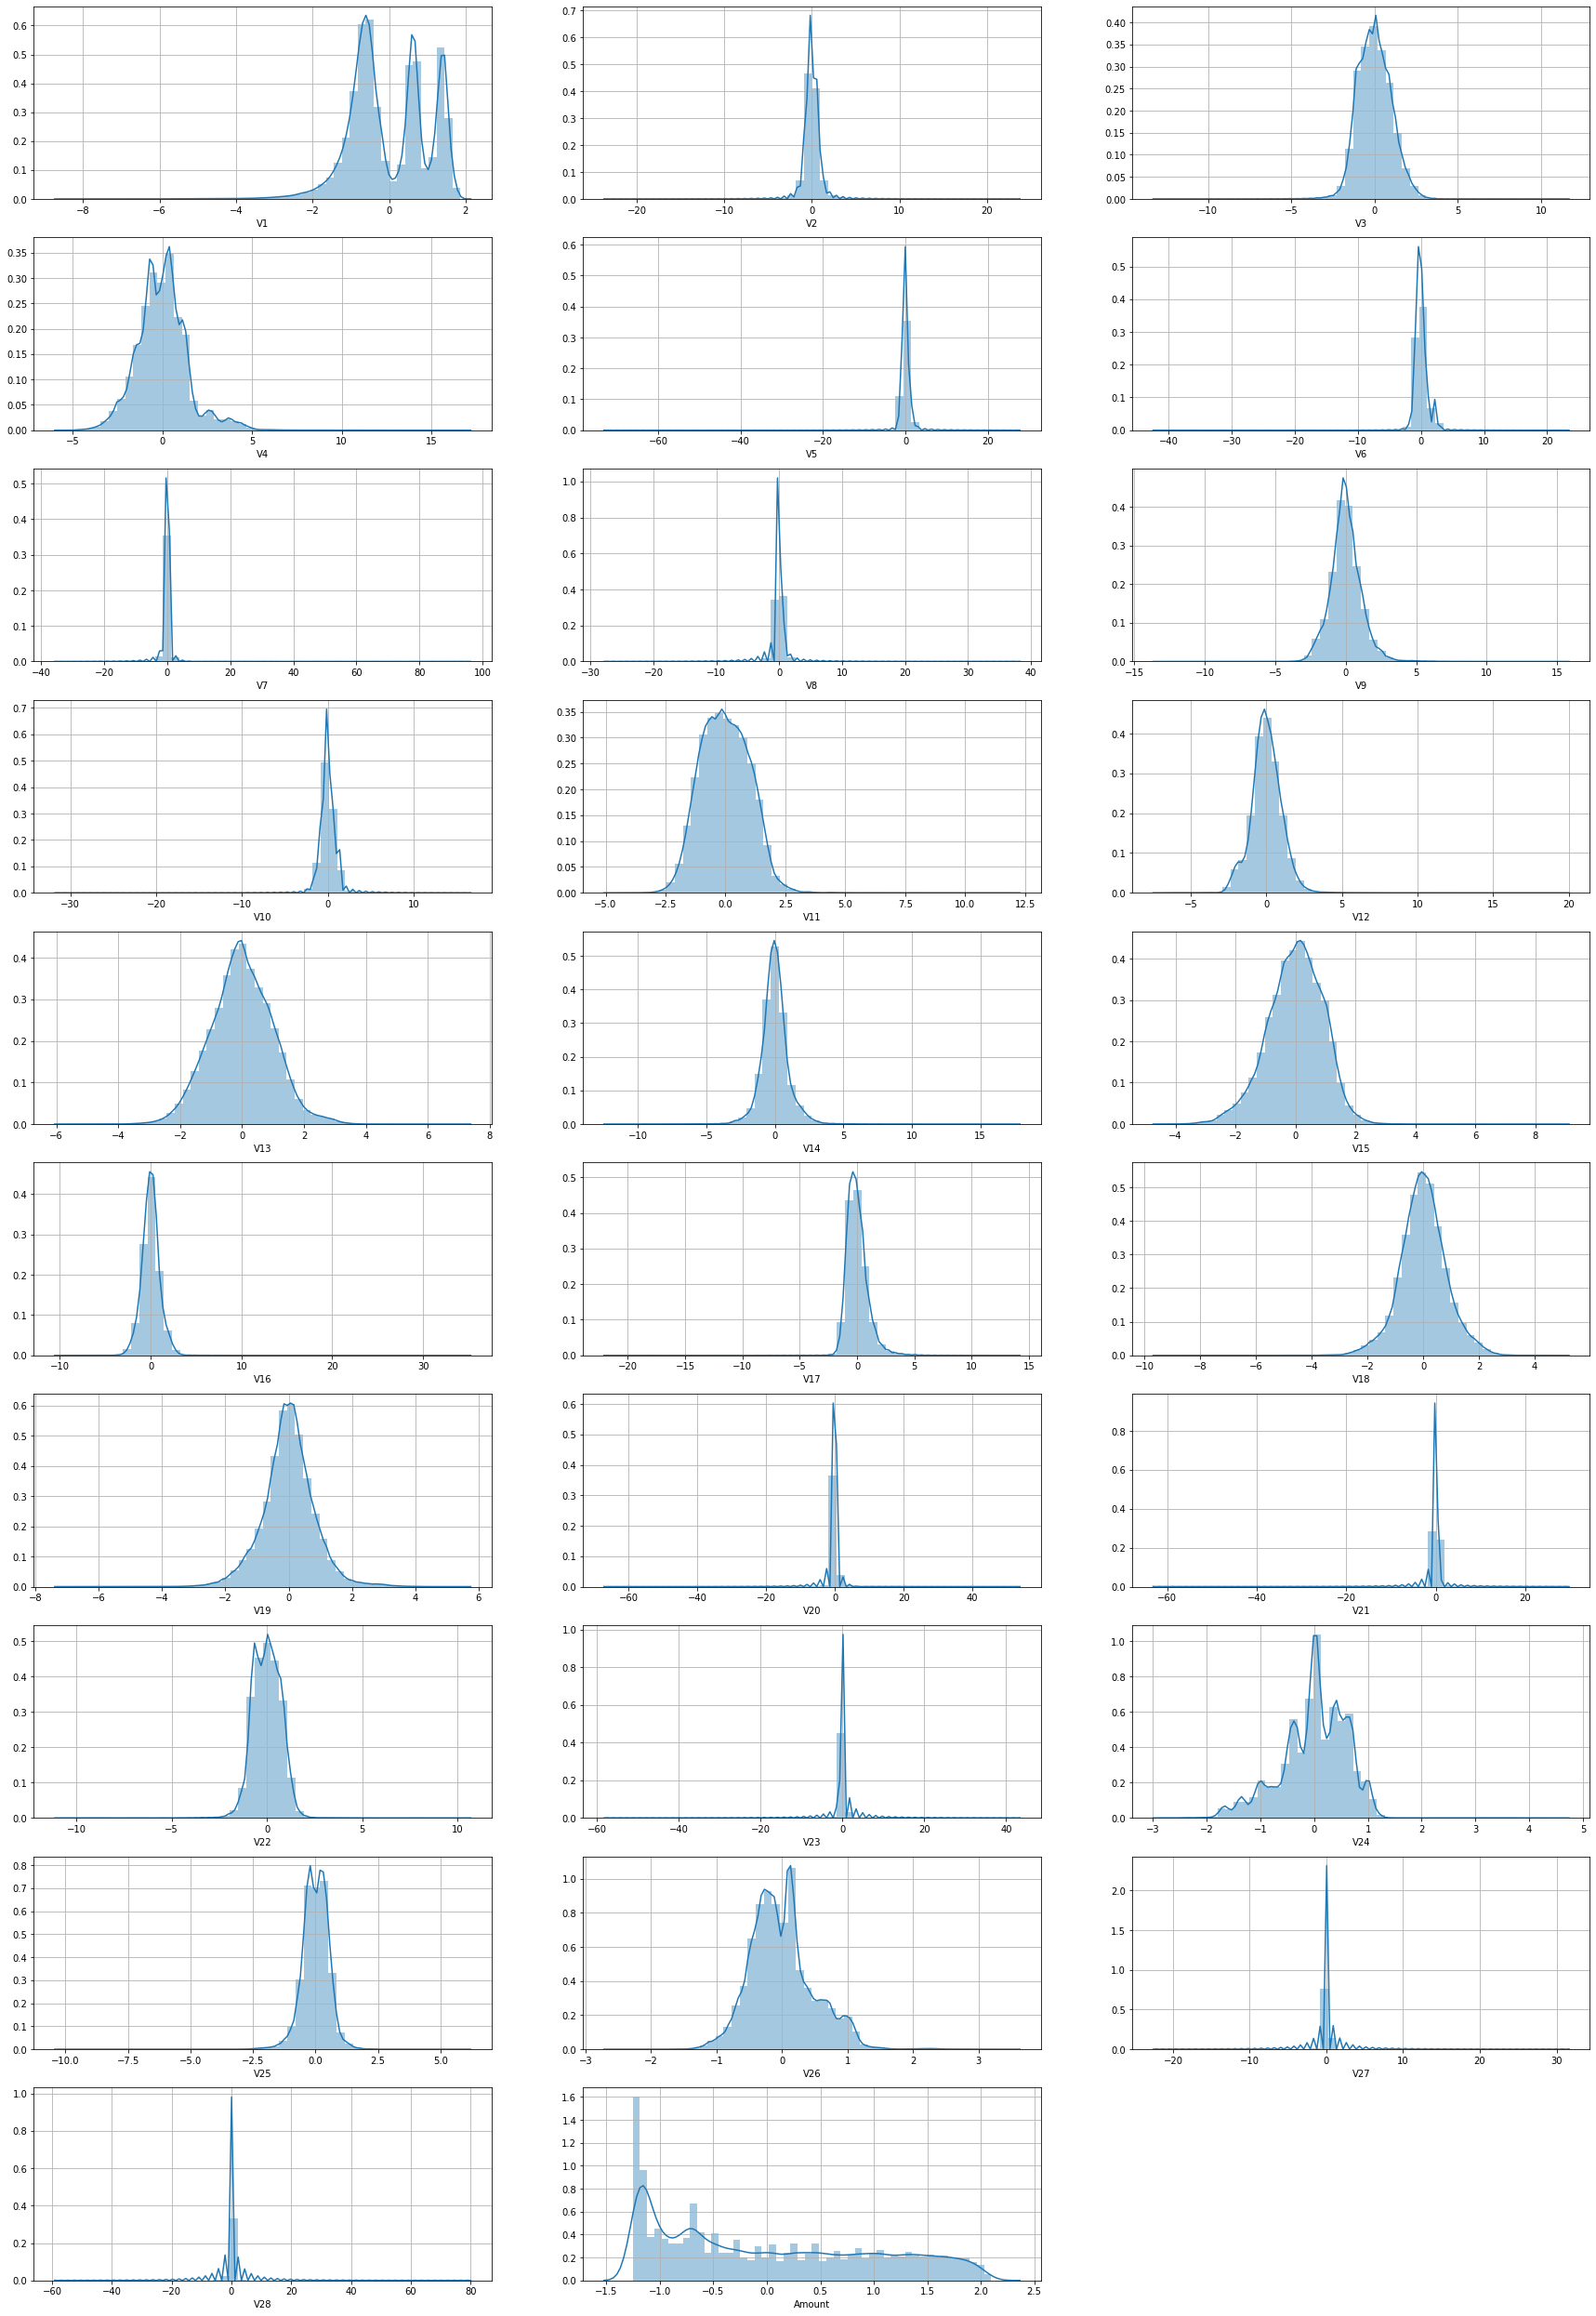

In [30]:
# plot the histogram of a variable from the dataset again to see the result 

var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

## Model Building with imbalanced data
We are going to build models on below mentioned algorithms and we will compare for the best model. We are not building models on SVM,  and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. KNN algorithms calculate distance between each data points and then this calculation iterates for all the data points to calcualte the nearest neighbour. This process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models.
    - Logistic Regression
    - Decision Tree
    - RandomForest
    - XGBoost

#### Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [31]:
# Class imbalance

y_train.value_counts()/y_train.shape

0   0.998271
1   0.001729
Name: Class, dtype: float64

# 1. Logistic Regression

In [32]:
# Logistic Regression parameters for K-fold cross vaidation

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=6, shuffle=True, random_state=42)


#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning

model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.1min finished


Best ROC AUC score:  0.9819182374456735


In [33]:
#print the optimum value of hyperparameters

print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 0.01}


In [34]:
# cross validation results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,4.751871,1.042247,0.063241,0.001852,0.010000,{'C': 0.01},0.975525,0.954336,0.992869,0.991082,0.992445,0.985253,0.981918,0.013708,1,0.985391,0.990539,0.983417,0.983850,0.983542,0.984375,0.985186,0.002482
1,4.603570,0.256883,0.066102,0.002789,0.100000,{'C': 0.1},0.971079,0.947717,0.992955,0.989825,0.991093,0.981505,0.979029,0.015842,2,0.984134,0.988602,0.981198,0.981696,0.981206,0.982446,0.983214,0.002610
2,5.368585,0.265952,0.066885,0.003207,1,{'C': 1},0.968930,0.945960,0.992763,0.989096,0.990601,0.980627,0.977996,0.016409,3,0.983517,0.987893,0.980425,0.980955,0.980376,0.981723,0.982482,0.002643
3,5.547107,0.207732,0.063615,0.006262,10,{'C': 10},0.968657,0.945717,0.992752,0.988986,0.990546,0.980517,0.977863,0.016489,4,0.983433,0.987807,0.980326,0.980864,0.980267,0.981635,0.982389,0.002649
4,5.681756,0.230031,0.074622,0.007404,100,{'C': 100},0.968628,0.945693,0.992750,0.988977,0.990542,0.980504,0.977849,0.016498,6,0.983423,0.987796,0.980316,0.980854,0.980255,0.981626,0.982378,0.002649
5,7.394277,0.788316,0.098107,0.048324,1000,{'C': 1000},0.968631,0.945692,0.992750,0.988975,0.990542,0.980505,0.977849,0.016498,5,0.983423,0.987797,0.980314,0.980852,0.980254,0.981625,0.982378,0.002650


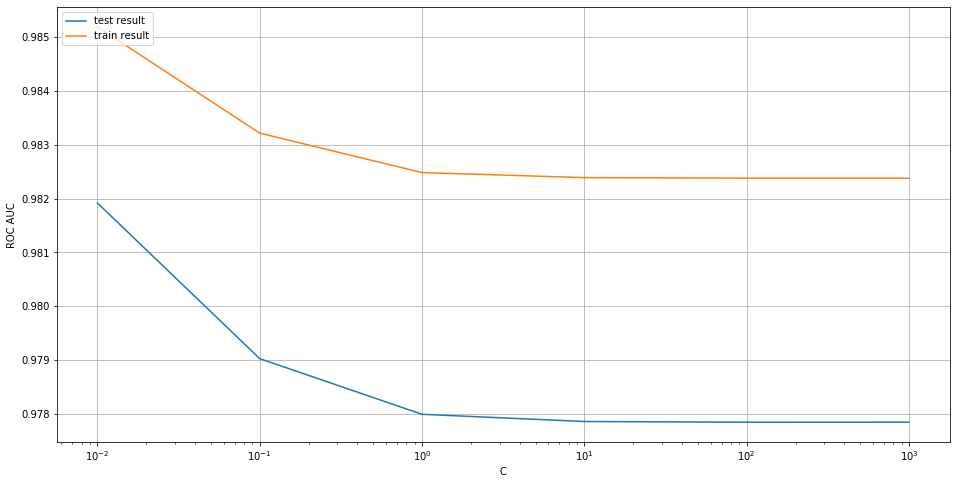

In [35]:
# plot of C versus train and validation scores

plt.figure(figsize=(16, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with optimal C

In [36]:
 model_cv.best_params_

{'C': 0.01}

In [37]:
# Instantiating the model with best C

log_reg_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset

log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Prediction and model evalution on the train set

In [38]:
# Creating function to display ROC-AUC score, f1 score and classification report

def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print("\n\n")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [39]:
# Predictions on the train set

y_train_pred = log_reg_imb_model.predict(X_train)

In [40]:
display_scores(y_train, y_train_pred)

F1 Score: 74.47%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.96      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [41]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [42]:
# Predicted probability

y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

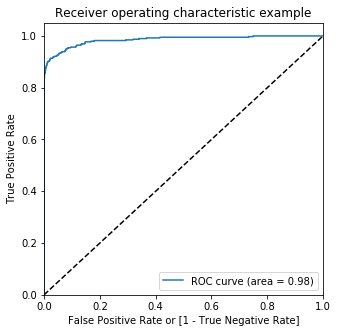

In [43]:
# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [44]:
# Making prediction on the test set

y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 72.83%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
# Predicted probability

y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

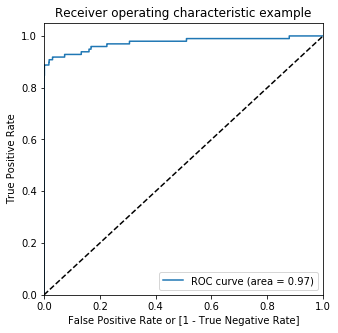

In [46]:
# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

We can see very good ROC on the test data set 0.97.

#### Model Summary

- Train set
    -     ROC : 98%
    - F1 Score: 74.47%
    
    
- Test set
    -     ROC : 97%
    - F1 score: 72.83%

# Decision Tree

In [47]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train,y_train)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.7min finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [48]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,19.562185,0.732060,0.078088,0.009190,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.870988,0.951259,0.959582,0.895719,0.936913,0.937779,0.925373,0.031529,8
1,19.027674,1.203383,0.071991,0.012788,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.870992,0.951255,0.959586,0.895719,0.936885,0.952914,0.927892,0.032990,5
2,16.869394,0.031312,0.065026,0.009545,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.870753,0.951200,0.959557,0.895443,0.936865,0.953084,0.927817,0.033113,6
3,16.787679,0.149192,0.065279,0.005837,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.870753,0.951200,0.959557,0.895443,0.936865,0.953084,0.927817,0.033113,6
4,35.256573,0.109038,0.077101,0.003424,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.906932,0.953807,0.959468,0.916955,0.884723,0.961060,0.930491,0.029299,3


In [49]:
# Printing the optimal score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.933357093268484


In [50]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Decision Tree with optimal hyperparameters

In [51]:
# Model with optimal hyperparameters

dt_imb_model = grid_search.best_estimator_

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

#### Prediction on the train set

In [52]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 68.32%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.56      0.68       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



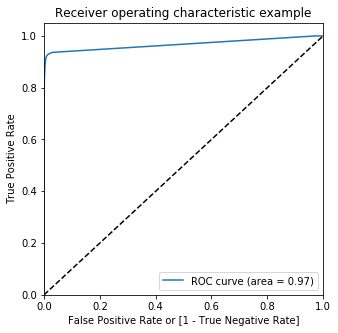

In [53]:
# Predicted probability

y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [54]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 61.73%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



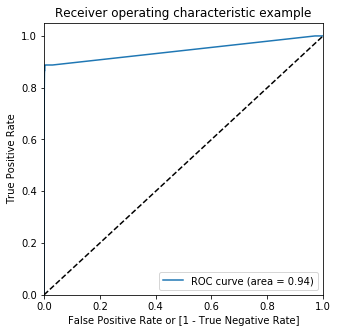

In [55]:
# Predicted probability

y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC Score: 97%
    - F1 score : 68.32%
    
    
- Test set
    - ROC Score: 94%
    - F1 score : 61.73%

# RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train,y_train)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 63.5min finished


GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [57]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,217.438006,2.620198,1.033382,0.031346,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.945206,0.977444,0.987203,0.934909,0.970143,0.994008,0.968152,0.021422,7
1,215.549143,1.042273,1.041027,0.026007,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.950800,0.986321,0.982125,0.956420,0.965297,0.993609,0.972429,0.015867,5
2,215.130475,1.240798,1.032698,0.027537,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.942315,0.982713,0.984650,0.954246,0.963138,0.990838,0.969650,0.017661,6
3,215.442784,1.083549,1.065678,0.042166,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.940939,0.984053,0.985224,0.940119,0.960192,0.990994,0.966920,0.021003,8
4,419.974954,3.167619,1.626832,0.136545,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.954410,0.985322,0.992237,0.959141,0.972452,0.995708,0.976545,0.015812,4


In [58]:
# Printing the optimal score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9789872829522904


In [59]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Random forest with optimal hyperparameters

In [60]:
# Model with optimal hyperparameters

rf_imb_model = grid_search.best_estimator_

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

#### Prediction on the train set

In [61]:
y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 75.93%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.67      0.76       394

    accuracy                           1.00    227845
   macro avg       0.94      0.84      0.88    227845
weighted avg       1.00      1.00      1.00    227845



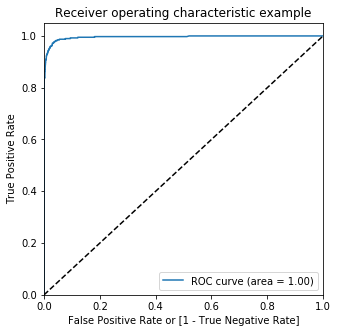

In [62]:
# Predicted probability

y_train_pred_proba = rf_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [63]:
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 74.73%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.69      0.75        98

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



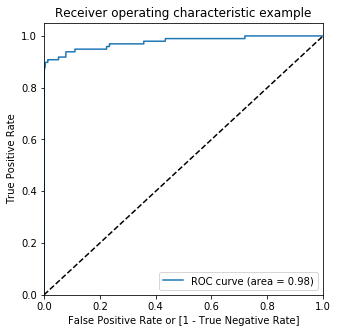

In [64]:
# Predicted probability

y_test_pred_proba = rf_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC Score: 100%
    - F1 score : 75.93%
    
    
- Test set
    - ROC Score: 98%
    - F1 score : 74.73%

# XGBoost

In [65]:
# creating a KFold object 

folds = 6

# specify range of hyperparameters

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model

model_cv.fit(X_train, y_train)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 39.4min finished


GridSearchCV(cv=6, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [66]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,198.620481,2.106404,0.694406,0.016825,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.965482,0.984547,0.988312,0.955314,0.980601,0.997619,0.978646,0.014199,4,0.999571,0.999130,0.999531,0.999827,0.999348,0.999726,0.999522,0.000231
1,259.055584,4.169776,0.677583,0.016021,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.970991,0.981412,0.991472,0.958655,0.986348,0.997436,0.981052,0.012962,2,0.999838,0.999842,0.999773,0.999943,0.999759,0.999586,0.999790,0.000109
2,306.527341,3.760820,0.668090,0.036345,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.974468,0.978945,0.993815,0.971121,0.988689,0.997326,0.984061,0.009816,1,0.999898,0.999772,0.999755,0.999892,0.999749,0.999447,0.999752,0.000149
3,192.273557,7.548763,0.730217,0.019046,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.959780,0.979294,0.967879,0.959564,0.952683,0.989236,0.968073,0.012595,6,0.999993,0.999940,0.999697,0.999985,0.999982,0.999971,0.999928,0.000105
4,259.296764,1.510128,0.739212,0.004419,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.966769,0.984633,0.987610,0.958064,0.976212,0.995822,0.978185,0.012784,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [67]:
# Printing the optimal score and hyperparameters

print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9840606138864207


In [68]:
print(model_cv.best_estimator_)

XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.9)


In [69]:
# Printing best params

model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

#### XGBoost model with optimal hyperparameter

In [70]:
# fit model on training data

xgb_imb_model = model_cv.best_estimator_

xgb_imb_model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.9)

#### Model evaluation on train set

In [71]:
# Predictions on the train set

y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 91.97%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.86      0.92       394

    accuracy                           1.00    227845
   macro avg       1.00      0.93      0.96    227845
weighted avg       1.00      1.00      1.00    227845



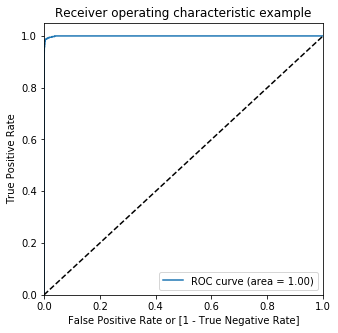

In [72]:
# Predicted probability

y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluating the model on the test set

In [73]:
# Predictions on the test set

y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 83.87%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



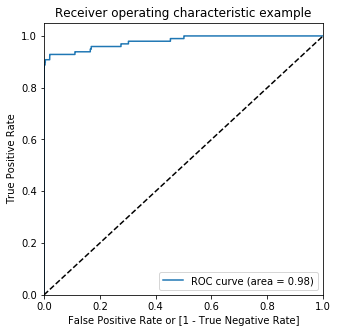

In [74]:
# Predicted probability

y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 91.97%
- Test set
    - ROC score: 98%
    - F1 score: 83.87%

**XGBoost model is giving good performance on the unbalanced data among these 3 models. ROC-AUC score on the train data is 100% and on test data 97%.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [75]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

Top var = 17
2nd Top var = 14
3rd Top var = 12


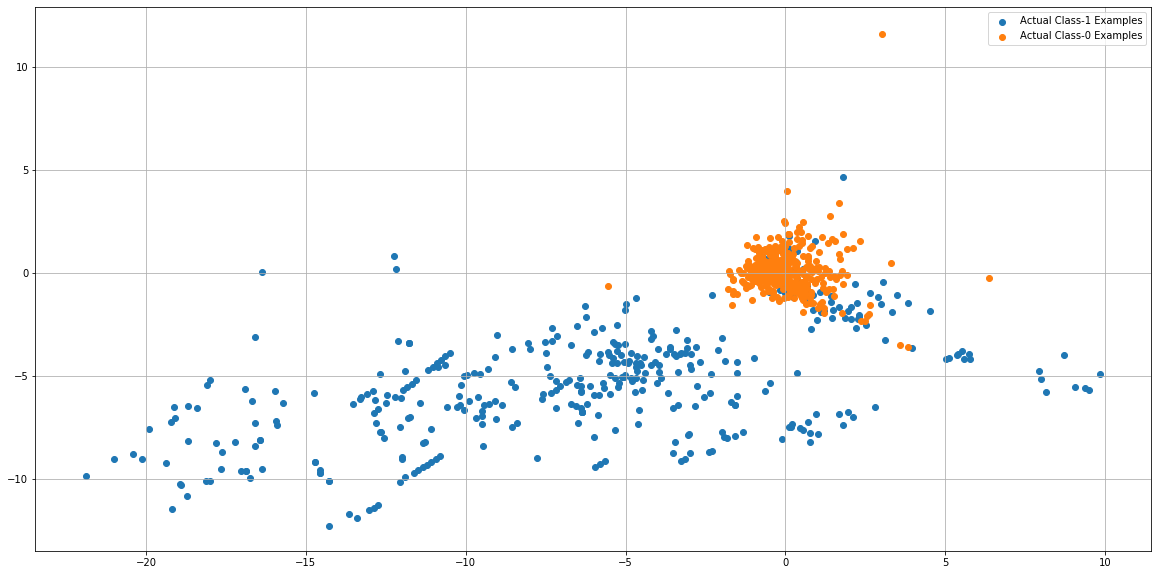

In [76]:
# Variable on Index-17 and Index-14 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.grid()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [77]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))

Train auc = 0.9996164511095568


In [78]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.0067036375


We can see that the threshold is 0.67, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Model building with balancing Classes

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [79]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy

oversample = RandomOverSampler(sampling_strategy='minority')

#fit and apply the transform

X_over, y_over = oversample.fit_resample(X_train, y_train)
X_over.shape, y_over.shape

((454902, 29), (454902,))

In [80]:
from collections import Counter

# Befor sampling class distribution

print('Before sampling class distribution:-',Counter(y_train))

Before sampling class distribution:- Counter({0: 227451, 1: 394})


In [81]:
# new class distribution 

print('New class distribution:-',Counter(y_over))

New class distribution:- Counter({0: 227451, 1: 227451})


# Logistic Regrassion with Random Oversampling

In [82]:
# Logistic Regression parameters for K-fold cross vaidation

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=6, shuffle=True, random_state=42)


#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning

model_cv.fit(X_over, y_over)

#print the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.8min finished


Best ROC AUC score:  0.9883179891173337


In [83]:
#print the optimum value of hyperparameters

print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 100}


In [84]:
# cross validation results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,9.701522,0.808645,0.128756,0.009541,0.010000,{'C': 0.01},0.988226,0.987922,0.988519,0.988315,0.988265,0.987889,0.988189,0.000221,6,0.988225,0.988243,0.988146,0.988179,0.988216,0.988209,0.988203,0.000032
1,9.339913,0.452011,0.124257,0.012820,0.100000,{'C': 0.1},0.988347,0.988044,0.988620,0.988424,0.988380,0.988008,0.988304,0.000215,5,0.988334,0.988359,0.988263,0.988289,0.988330,0.988323,0.988316,0.000031
2,10.302486,0.643650,0.123257,0.010072,1,{'C': 1},0.988358,0.988058,0.988632,0.988436,0.988393,0.988022,0.988316,0.000214,4,0.988346,0.988371,0.988276,0.988302,0.988344,0.988335,0.988329,0.000031
3,10.325972,0.477701,0.128588,0.009439,10,{'C': 10},0.988361,0.988060,0.988632,0.988438,0.988394,0.988023,0.988318,0.000214,3,0.988348,0.988373,0.988277,0.988304,0.988345,0.988337,0.988331,0.000031
4,9.849929,0.500641,0.122761,0.006144,100,{'C': 100},0.988360,0.988060,0.988632,0.988438,0.988395,0.988023,0.988318,0.000214,1,0.988348,0.988373,0.988278,0.988304,0.988346,0.988337,0.988331,0.000031


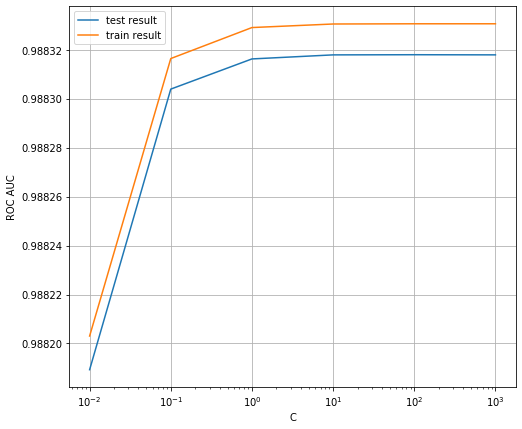

In [85]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 7))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with hyperparameter tuning

In [86]:
model_cv.best_params_

{'C': 100}

In [87]:
# Instantiating the model

logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data

logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [88]:
# Predictions on the train set

y_train_pred = logreg_over_model.predict(X_over)

In [89]:
# Printing scores

display_scores(y_over, y_train_pred)

F1 Score: 94.91%



Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



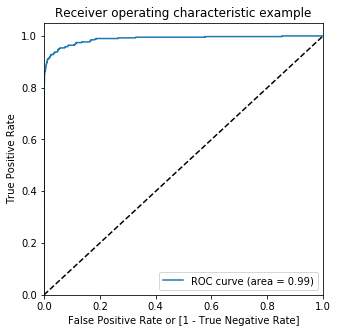

In [90]:
# Predicted probability

y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [91]:
# Evaluating on test data

y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores

display_scores(y_test, y_test_pred)

F1 Score: 9.99%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



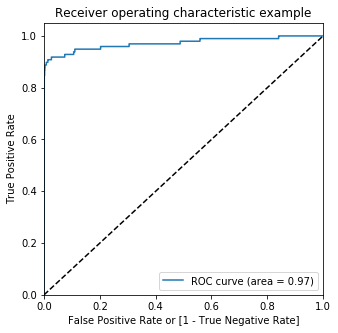

In [92]:
# Predicted probability

y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.91%
- Test set
    - ROC score : 97%
    - F1 score: 9.99%

# Decision Tree with Random Oversampling

In [93]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_over,y_over)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.2min finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [94]:
# Printing the optimal roc score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.999408910500152


In [95]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [96]:
# Model with optimal hyperparameters

dt_over_model = grid_search.best_estimator_

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

#### Model evatuation on train data

In [97]:
# Predictions on the train set

y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.46%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



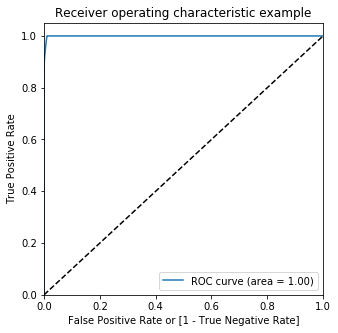

In [98]:
# Predicted probability

y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve

draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [99]:
# Evaluating model on the test data

y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 20.07%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.85      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.92      0.60     56962
weighted avg       1.00      0.99      0.99     56962



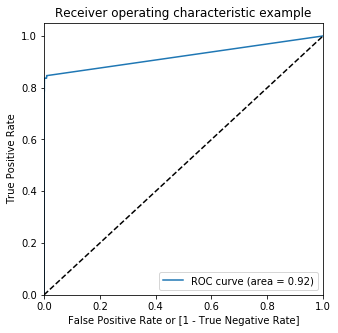

In [100]:
# Predicted probability

y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.46%
- Test set
    - ROC score : 92%
    - F1 score: 20.07%

# Random Forest with Random Oversampling

In [101]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_over,y_over)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 84.2min finished


GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [102]:
# Printing the optimal roc score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9999429607524969


#### Random Forest with optimal hyperparameters

In [103]:
# Model with optimal hyperparameters

rf_over_model = grid_search.best_estimator_

rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

#### Model evatuation on train data

In [104]:
# Predictions on the train set

y_train_pred = rf_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.84%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



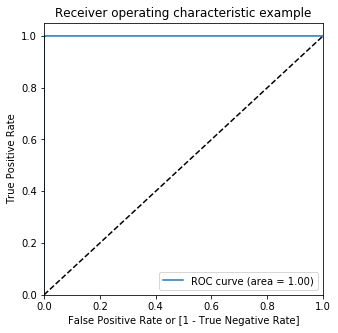

In [105]:
# Predicted probability

y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve

draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [106]:
# Evaluating model on the test data

y_test_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 69.6%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.89      0.70        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962



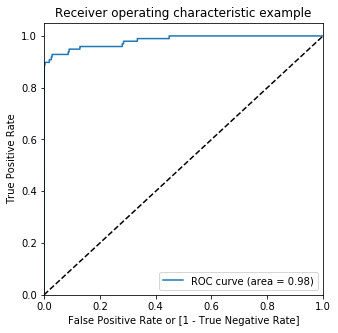

In [107]:
# Predicted probability

y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.84%
- Test set
    - ROC score : 98%
    - F1 score: 69.60%

# XGBoost with Random Oversampling

In [108]:
# creating a KFold object 

folds = 6

# specify range of hyperparameters

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model

model_cv.fit(X_over, y_over) 

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 71.2min finished


GridSearchCV(cv=6, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [109]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,391.509157,2.594345,1.467095,0.034088,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999920,0.999940,0.999852,0.999879,0.999924,0.999906,0.999903,0.000029,4,0.999912,0.999924,0.999933,0.999904,0.999907,0.999914,0.999916,0.000010
1,479.040401,2.188523,1.430451,0.025168,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999898,0.999936,0.999841,0.999896,0.999936,0.999900,0.999901,0.000032,5,0.999901,0.999915,0.999922,0.999911,0.999918,0.999907,0.999912,0.000007
2,516.960211,7.802849,1.429120,0.034359,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999884,0.999940,0.999829,0.999886,0.999918,0.999899,0.999892,0.000034,6,0.999889,0.999902,0.999930,0.999909,0.999907,0.999899,0.999906,0.000013
3,394.465336,6.337227,1.502239,0.033609,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999998,0.999994,0.999966,0.999990,0.999985,0.999977,0.999985,0.000011,3,0.999999,0.999998,0.999998,0.999998,0.999996,0.999997,0.999998,0.000001
4,474.329805,3.742238,1.487583,0.014537,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999996,0.999995,0.999959,0.999990,0.999994,0.999975,0.999985,0.000014,2,0.999998,0.999998,0.999998,0.999999,0.999998,0.999997,0.999998,0.000000
5,508.233917,15.559237,1.303530,0.199751,0.600000,0.900000,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999999,0.999995,0.999959,0.999981,0.999994,0.999986,0.999986,0.000013,1,0.999998,0.999999,0.999997,0.999998,0.999997,0.999999,0.999998,0.000001


In [110]:
# Printing the optimal score and hyperparameters

print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9999857528007298


In [111]:
print(model_cv.best_estimator_)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


In [112]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

#### XGBoost with optimal hyperparameter

In [113]:
# fit model on training data

xgb_over_model = model_cv.best_estimator_
xgb_over_model.fit(X_over, y_over)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)

#### Model evatuation on train data

In [114]:
# Predictions on the train set

y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 99.99%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



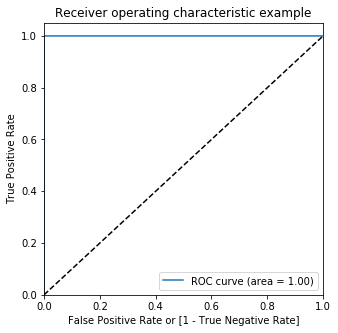

In [115]:
# Predicted probability

y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve

draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [116]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 78.9%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.88      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962



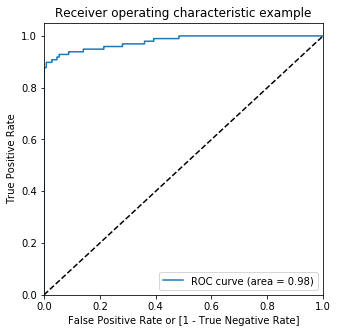

In [117]:
# Predicted probability

y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.99%
- Test set
    - ROC score : 98%
    - F1 score: 88.9%

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

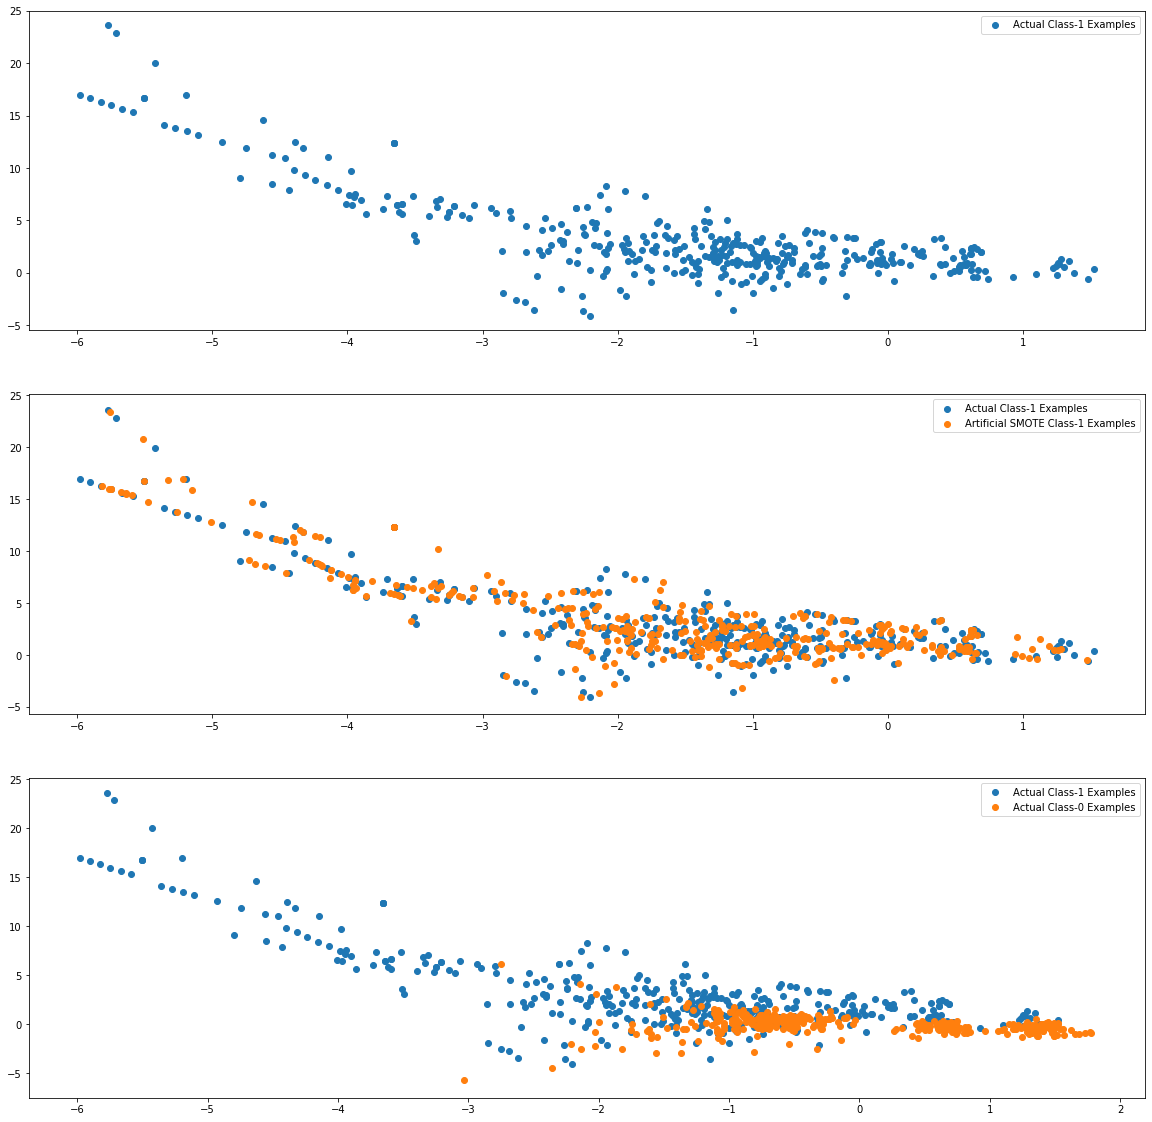

In [118]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with SMOTE

In [119]:
# Creating KFold object with 6 splits

folds = KFold(n_splits=6, shuffle=True, random_state=4)

# Specify params

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True) 

# Fit the model

model_cv.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_cv.best_score_)


Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.9min finished


Best ROC AUC score:  0.9905163333922943


In [120]:
#print the optimum value of hyperparameters

print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 1000}


In [121]:
# cross validation results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,10.963247,1.112957,0.128922,0.003872,0.010000,{'C': 0.01},0.990577,0.990323,0.990805,0.990190,0.990095,0.990474,0.990411,0.000239,6,0.990379,0.990416,0.990309,0.990506,0.990516,0.990401,0.990421,0.000072
1,10.136421,0.392865,0.138416,0.012704,0.100000,{'C': 0.1},0.990654,0.990430,0.990897,0.990283,0.990194,0.990573,0.990505,0.000235,5,0.990474,0.990509,0.990404,0.990603,0.990610,0.990495,0.990516,0.000072
2,10.069796,0.174033,0.152408,0.020594,1,{'C': 1},0.990662,0.990441,0.990906,0.990293,0.990205,0.990584,0.990515,0.000235,4,0.990484,0.990519,0.990414,0.990613,0.990620,0.990505,0.990526,0.000072
3,9.758654,0.349104,0.138415,0.009025,10,{'C': 10},0.990662,0.990442,0.990907,0.990294,0.990206,0.990585,0.990516,0.000235,3,0.990485,0.990520,0.990415,0.990614,0.990621,0.990507,0.990527,0.000072
4,9.964194,0.644381,0.145247,0.019107,100,{'C': 100},0.990663,0.990442,0.990908,0.990294,0.990206,0.990585,0.990516,0.000235,2,0.990485,0.990520,0.990415,0.990614,0.990621,0.990507,0.990527,0.000072


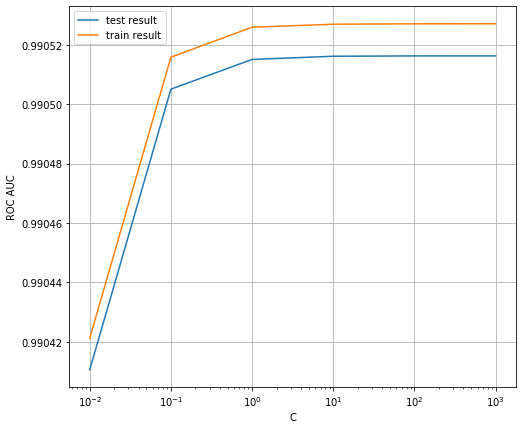

In [122]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 7))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with optimal C

In [123]:
# Printing best params

model_cv.best_params_

{'C': 1000}

In [124]:
# Instantiating the model

logreg_smote_model = model_cv.best_estimator_

# Fitting the model with balanced data

logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

#### Evaluating the model on train data

In [125]:
# Evaluating on train data

y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.8%



Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



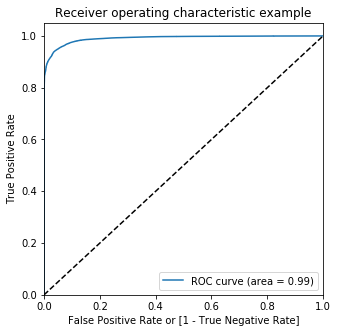

In [126]:
# Predicted probability

y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve

draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

In [127]:
# Evaluating on test data

y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.67%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



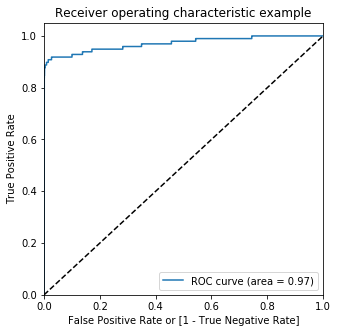

In [128]:
# Predicted probability

y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba_smote)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.8%
    
    
- Test set
    - ROC score : 97%
    - F1 score: 9.67%

# Decision Tree on balanced data with SMOTE

In [129]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train_smote,y_train_smote)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  9.8min finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [130]:
# Printing the optimal roc score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9984658978744149


In [131]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [132]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [133]:
# Model with optimal hyperparameters

dt_smote_model = grid_search.best_estimator_

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

#### Evaluating the model on train data

In [134]:
# Predictions on the train set

y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.93%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



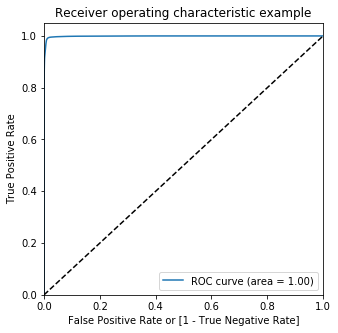

In [135]:
# Predicted probability

y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve

draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [136]:
# Evaluating model on the test data

y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 17.41%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962



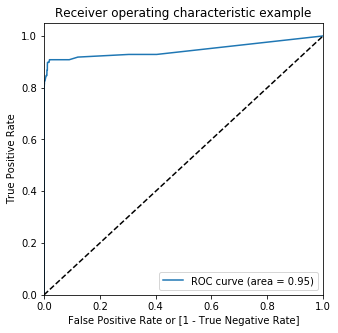

In [137]:
# Predicted probability

y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.93%
- Test set
    - ROC score : 95%
    - F1 score: 17.41%

# Randomforest on balanced data with SMOTE

In [138]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train_smote,y_train_smote)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 116.3min finished


GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [139]:
# Printing the optimal roc score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.999513764512361


In [140]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [141]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [142]:
# Model with optimal hyperparameters

rf_smote_model = grid_search.best_estimator_

rf_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

#### Evaluating the model on train data

In [143]:
# Predictions on the train set

y_train_pred_smote = rf_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.96%



Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    227451
           1       1.00      0.98      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



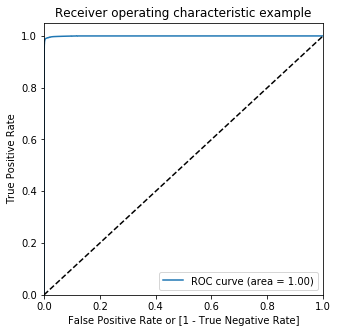

In [144]:
# Predicted probability

y_train_pred_proba = rf_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve

draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [145]:
# Evaluating model on the test data

y_pred = rf_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 50.88%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.89      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.94      0.75     56962
weighted avg       1.00      1.00      1.00     56962



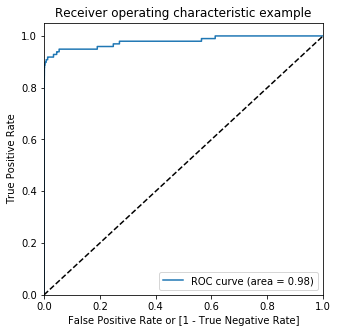

In [146]:

# Predicted probability

y_test_pred_smote = rf_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.96%
- Test set
    - ROC score : 98%
    - F1 score: 50.88%

# XGBoost on balanced data with SMOTE

In [147]:
# creating a KFold object 

folds = 5

# specify range of hyperparameters

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model

model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 71.6min finished


GridSearchCV(cv=5, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [148]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,426.956989,1.451069,1.709346,0.030923,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999578,0.999565,0.999570,0.999629,0.999617,0.999592,0.000026,4,0.999594,0.999603,0.999669,0.999625,0.999637,0.999626,0.000026
1,560.200711,8.134988,1.694957,0.005211,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999582,0.999613,0.999543,0.999595,0.999550,0.999577,0.000027,5,0.999603,0.999638,0.999639,0.999601,0.999595,0.999615,0.000019
2,667.741868,4.972811,1.709546,0.053515,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999593,0.999571,0.999502,0.999564,0.999571,0.999560,0.000031,6,0.999621,0.999612,0.999597,0.999573,0.999602,0.999601,0.000016
3,424.489906,11.902039,1.802290,0.086271,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999957,0.999941,0.999911,0.999930,0.999941,0.999936,0.000015,3,0.999969,0.999965,0.999966,0.999958,0.999966,0.999965,0.000004
4,569.854570,10.467279,1.827274,0.159108,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999958,0.999946,0.999914,0.999939,0.999946,0.999940,0.000015,2,0.999967,0.999971,0.999971,0.999967,0.999969,0.999969,0.000002
5,610.577294,102.276718,1.365564,0.394926,0.600000,0.900000,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999961,0.999947,0.999930,0.999949,0.999946,0.999947,0.000010,1,0.999966,0.999975,0.999976,0.999967,0.999969,0.999971,0.000004


In [149]:
# Printing the optimal score and hyperparameters

print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9999465942002109


In [150]:
print(model_cv.best_estimator_)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


#### Model with optimal hyperparameter

In [151]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [152]:
# fit model on training data

xgb_smote_model = model_cv.best_estimator_
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)

#### Evaluating the model on the train data

In [153]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.9%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



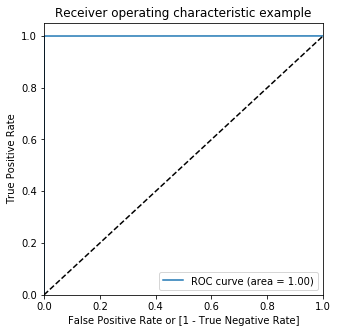

In [154]:
# Predicted probability

y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve

draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [155]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 54.04%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.89      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962



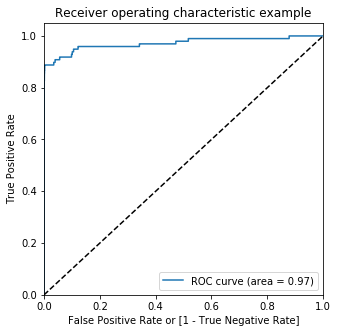

In [156]:
# Predicted probability

y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.99%
    
- Test set
    - ROC score : 97%
    - F1 score: 54.04%

## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

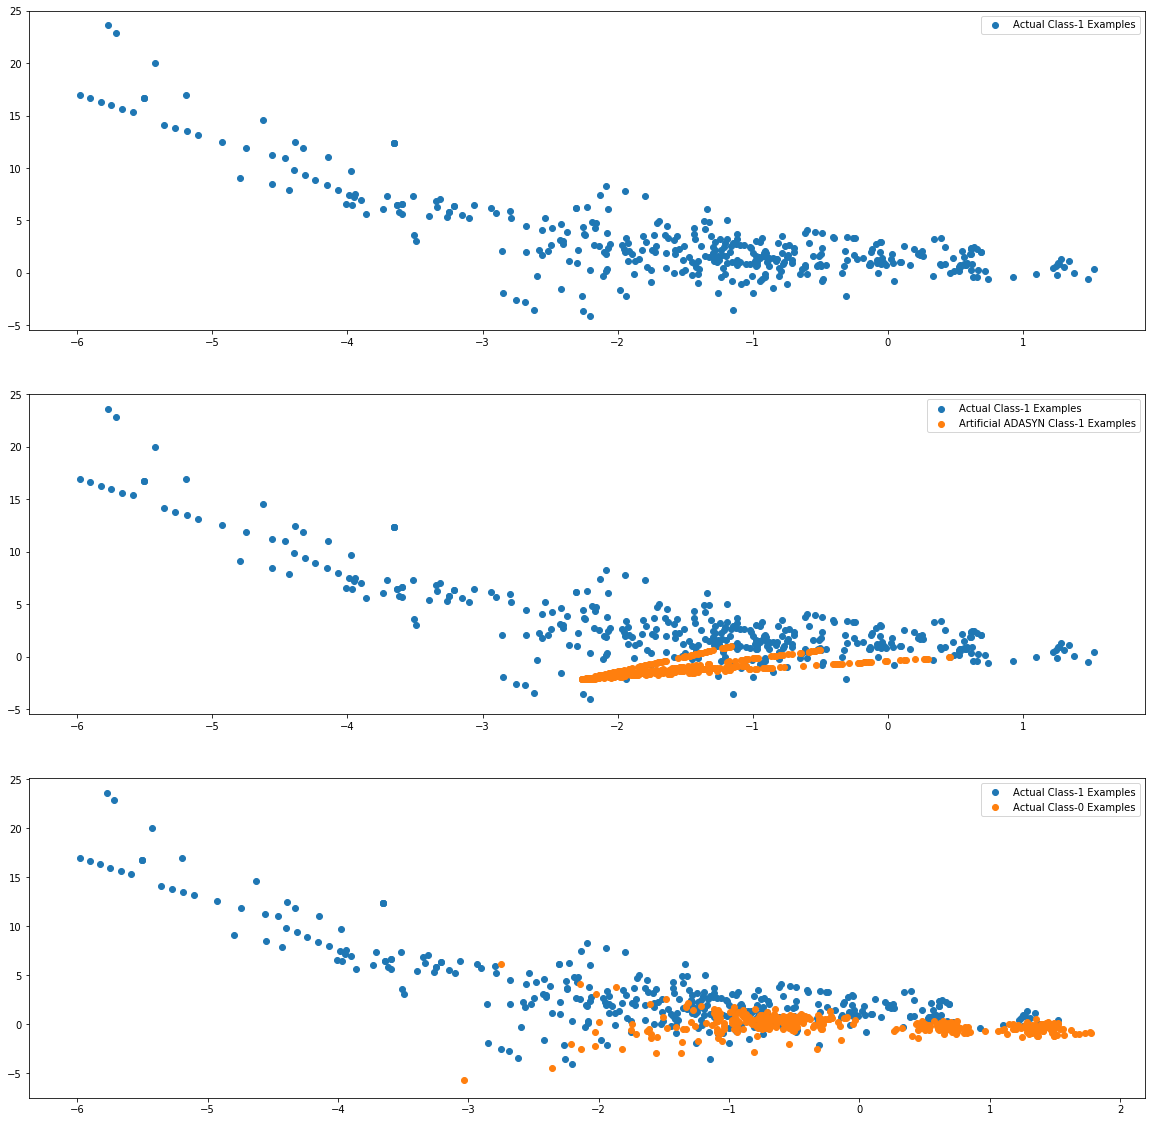

In [157]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression on balanced data with ADASYN

In [158]:
# Creating KFold object with 5 splits

folds = KFold(n_splits=6, shuffle=True, random_state=42)

# Specify params

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model

model_cv.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.9min finished


Best ROC AUC score:  0.9666482864296982


In [159]:
#print the optimum value of hyperparameters

print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 1000}


In [160]:
# cross validation results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,4.368903,0.620070,0.060298,0.005342,0.010000,{'C': 0.01},0.966273,0.965597,0.966835,0.966821,0.966392,0.966767,0.966448,0.000438,6,0.966503,0.966662,0.966376,0.966357,0.966579,0.966342,0.966470,0.000121
1,4.373077,0.339686,0.064795,0.008487,0.100000,{'C': 0.1},0.966479,0.965747,0.967010,0.966991,0.966558,0.966996,0.966630,0.000450,5,0.966697,0.966837,0.966560,0.966536,0.966765,0.966529,0.966654,0.000120
2,4.546002,0.283936,0.054970,0.007953,1,{'C': 1},0.966500,0.965760,0.967023,0.967007,0.966571,0.967018,0.966646,0.000451,4,0.966715,0.966851,0.966576,0.966552,0.966781,0.966545,0.966670,0.000119
3,4.178210,0.247056,0.056966,0.009993,10,{'C': 10},0.966502,0.965761,0.967025,0.967008,0.966572,0.967020,0.966648,0.000452,3,0.966717,0.966853,0.966578,0.966553,0.966783,0.966547,0.966672,0.000119
4,4.194101,0.240736,0.063462,0.013317,100,{'C': 100},0.966502,0.965762,0.967025,0.967009,0.966572,0.967020,0.966648,0.000452,2,0.966717,0.966853,0.966578,0.966553,0.966783,0.966548,0.966672,0.000119


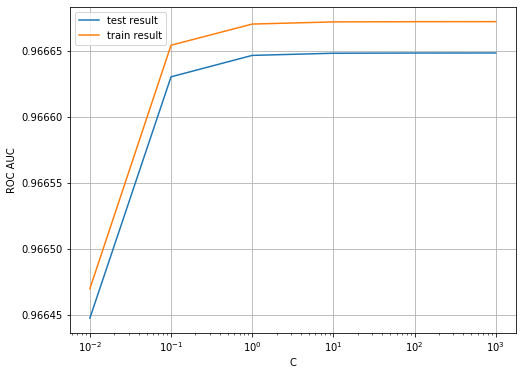

In [161]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with optimal C

In [162]:
model_cv.best_params_

{'C': 1000}

In [163]:
# Instantiating the model

logreg_adasyn_model = model_cv.best_estimator_

# Fitting the model 

logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with train data

In [164]:
# Evaluating on test data

y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 90.49%



Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91    227451
           1       0.91      0.90      0.90    227446

    accuracy                           0.91    454897
   macro avg       0.91      0.91      0.91    454897
weighted avg       0.91      0.91      0.91    454897



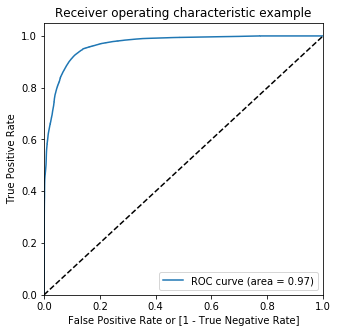

In [165]:
# Predicted probability

y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve

draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [166]:
# Evaluating on test data

y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.39%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



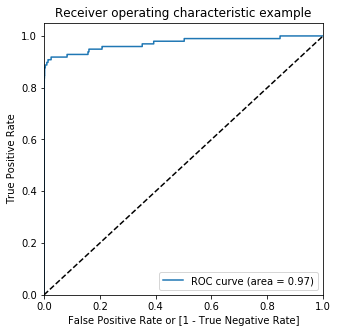

In [167]:
# Predicted probability

y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 97%
    - F1 score: 90.49%
- Test set
    - ROC score : 97%
    - F1 score: 3.39%

# Decision Tree on balanced data with ADASYN

In [168]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  9.4min finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [169]:
# Printing the optimal roc score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9394997671734441


In [170]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [171]:
# Model with optimal hyperparameters

dt_adasyn_model =grid_search.best_estimator_
dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)

#### Evaluating the model on train data

In [172]:
# Evaluating model on the test data

y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 91.46%



Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91    227451
           1       0.89      0.95      0.91    227446

    accuracy                           0.91    454897
   macro avg       0.91      0.91      0.91    454897
weighted avg       0.91      0.91      0.91    454897



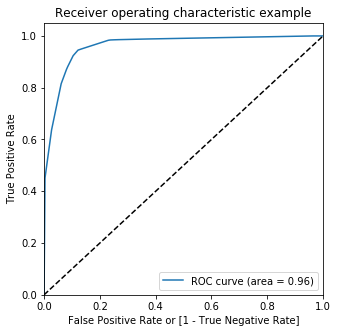

In [173]:
# Predicted probability

y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve

draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [174]:
# Evaluating model on the test data

y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 2.56%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93     56864
           1       0.01      0.94      0.03        98

    accuracy                           0.88     56962
   macro avg       0.51      0.91      0.48     56962
weighted avg       1.00      0.88      0.93     56962



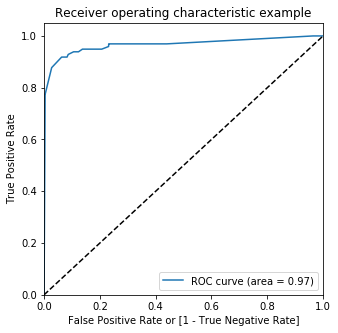

In [175]:
# Predicted probability

y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 96%
    - F1 score: 91.46%
    
- Test set
    - ROC score : 97%
    - F1 score: 2.56%

# RandomForest on balanced data with ADASYN

In [176]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 6, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 109.7min finished


GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [177]:
# Printing the optimal roc score and hyperparameters

print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9907780484385372


In [178]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with optimal hyperparameters

In [179]:
# Model with optimal hyperparameters

rf_adasyn_model =grid_search.best_estimator_
rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

#### Evaluating the model on train data

In [180]:
# Evaluating model on the test data

y_train_pred = rf_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.16%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227446

    accuracy                           0.99    454897
   macro avg       0.99      0.99      0.99    454897
weighted avg       0.99      0.99      0.99    454897



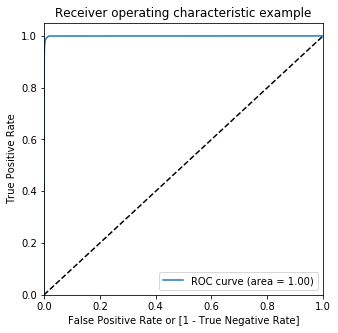

In [181]:
# Predicted probability

y_train_pred_proba = rf_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve

draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [182]:
# Evaluating model on the test data

y_pred = rf_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 22.03%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



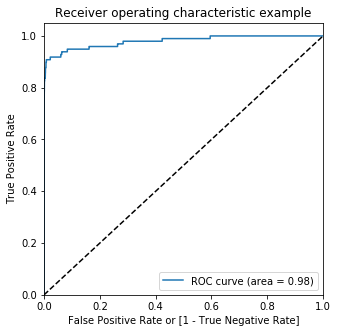

In [183]:
# Predicted probability

y_test_pred_proba = rf_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.16%
    
- Test set
    - ROC score : 98%
    - F1 score: 22.03%

# XGBoost on balanced data with ADASYN

In [184]:
# creating a KFold object 

folds = 6

# specify range of hyperparameters

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model

model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 135.3min finished


GridSearchCV(cv=6, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [185]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,671.661809,6.679478,2.192039,0.082841,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.977889,0.985505,0.992503,0.990095,0.997433,0.996897,0.990054,0.006782,5,0.999052,0.998938,0.998845,0.998870,0.998790,0.998827,0.998887,0.000087
1,899.581298,5.635744,2.507566,0.302231,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976346,0.984321,0.992441,0.993132,0.997188,0.996980,0.990068,0.007470,4,0.999123,0.998974,0.998908,0.998971,0.998893,0.998876,0.998958,0.000083
2,1097.001881,6.885687,2.294753,0.224194,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.976751,0.984101,0.992598,0.991134,0.997549,0.997434,0.989928,0.007423,6,0.999096,0.998849,0.998865,0.998928,0.998889,0.998834,0.998910,0.000088
3,668.386072,9.460617,2.337822,0.223546,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.989579,0.990804,0.992794,0.989782,0.999490,0.998607,0.993509,0.004061,3,0.999895,0.999873,0.999887,0.999921,0.999879,0.999879,0.999889,0.000016
4,910.970497,13.804779,2.184654,0.031345,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.987727,0.991521,0.993791,0.996150,0.999410,0.998764,0.994560,0.004087,1,0.999905,0.999908,0.999905,0.999939,0.999879,0.999868,0.999901,0.000023


In [186]:
# Printing the optimal score and hyperparameters

print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9945604856853186


In [187]:
print(model_cv.best_estimator_)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.6)


#### Model with optimal hyperparameter

In [188]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [189]:
# Model with optimal hyperparameter

xgb_adasyn_model = model_cv.best_estimator_
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.6)

#### Evaluating the model on the train data

In [190]:
# Predicting on the train set

y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)

# Printing the scores

display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.78%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227446

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



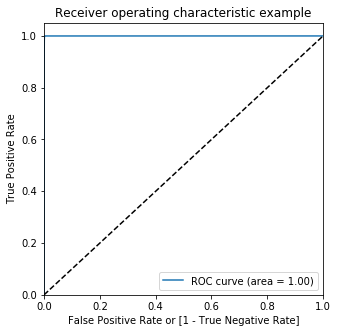

In [191]:
# Predicted probability

y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve

draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [192]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 35.71%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.22      0.87      0.36        98

    accuracy                           0.99     56962
   macro avg       0.61      0.93      0.68     56962
weighted avg       1.00      0.99      1.00     56962



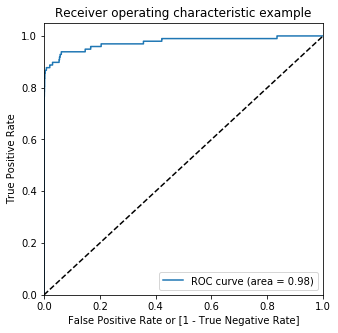

In [193]:
# Predicted probability

y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve

draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.78%
- Test set
    - ROC score : 98%
    - F1 score: 37.71%

### Select the oversampling method which shows the best result on a model
We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 98% on the test data and F1 score 100% on train data and 78% in the test data. 

Hence, we conclude that the `XGBoost model with Adasyn` is the best model.

### Print the important features of the best model to understand the dataset

In [194]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 4
3rd Top var = 7


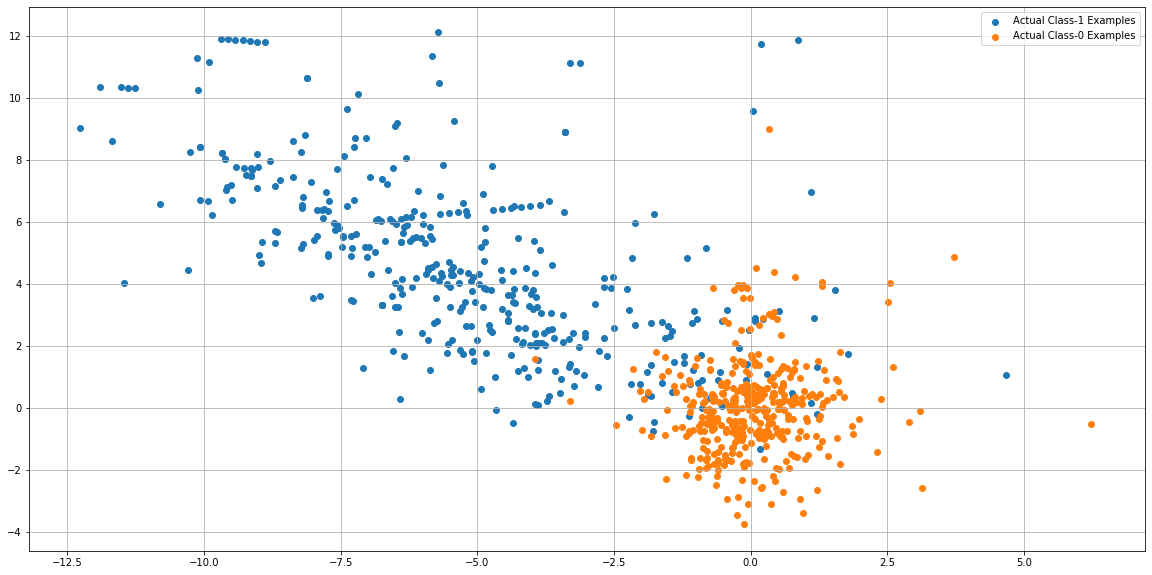

In [195]:
# Variable on Index-14 and Index-4 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.grid()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [196]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))

Train auc = 0.9998678386760919


In [197]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.76417536


We have found that 76.4% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

### Summary to the business
Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(98%) and also high Recall(87%). Hence, we can go with the XGBoost model here.